In [28]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import seaborn as sns
from configs import engram_dir

# Helper function

In [29]:
def plot_latents_w_true_transitions(model, savedir=None, figsize=(0.9, 0.9)):
    model = f'{generic_exp_name}_{model}'
    colors = ['C4', 'C5', 'C6', 'C7']
    markers = ['s', '^', 'o']
    iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
    for _iter in iterations:
        print(f'Iteration {_iter}')
        # Load data and labels
        _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==_iter)]
        latents = np.array(list(_df['latents']))
        quadrant_labels = np.array(list(_df['quadrant']))
        xs = np.array(list(_df['x']))
        ys = np.array(list(_df['y']))
        goal_state = _df.iloc[0]['goal_state']

        # PCA reduction
        reducer = PCA(n_components=3)
        reducer.fit(latents)
        reduced_latents = reducer.transform(latents)

        # Plot
        fig = plt.figure(figsize=figsize, constrained_layout=True)
        ax = fig.add_subplot(111,projection='3d')
        for i in np.arange(reduced_latents.shape[0]):
            # Draw points
            x = xs[i]; y = ys[i]
            color=colors[quadrant_labels[i]]
            if [x,y] == goal_state:
                color='red'
            ax.scatter(
                reduced_latents[i,0], reduced_latents[i,1], reduced_latents[i,2],
                color=color, marker='X', alpha=0.5, s=6)
            # Now draw edges
            for offset in [[-1,0], [1,0], [0,-1], [0,1]]:
                _x = x + offset[0]; _y = y + offset[1]
                j = np.argwhere(np.logical_and(xs==_x, ys==_y))
                if len(j)==0: continue
                j = j[0,0]
                ax.plot(
                    [reduced_latents[i,0], reduced_latents[j,0]],
                    [reduced_latents[i,1], reduced_latents[j,1]],
                    [reduced_latents[i,2], reduced_latents[j,2]],
                    color='gray', alpha=0.3, linewidth=0.6
                    )
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_zticks([])
        if savedir is not None:
            os.makedirs(savedir, exist_ok=True)
            plt.savefig(savedir + f'/{_iter}.png', dpi=300, transparent=True)
        plt.show()

# Implicit Quantile Networks

### Parameters

In [30]:
internal_dim = 10
generic_exp_name = 'iqn3'
network_yaml = 'iqn'
episode = 350
hue_order = ['mf1', 'mf0']

exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [31]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]

Iteration 0


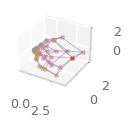

Iteration 1


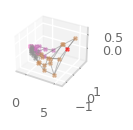

Iteration 2


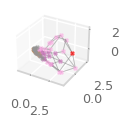

Iteration 3


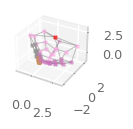

Iteration 4


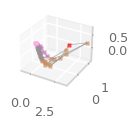

Iteration 5


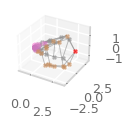

In [32]:
plot_latents_w_true_transitions(hue_order[1])

# Implicit Quantile Networks

### Parameters

In [25]:
internal_dim = 10
generic_exp_name = 'iqn2_discount07'
network_yaml = 'iqn'
episode = 350
hue_order = ['mf0']

exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [26]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]

Iteration 0


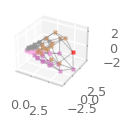

Iteration 1


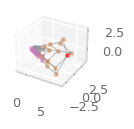

Iteration 2


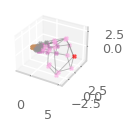

Iteration 3


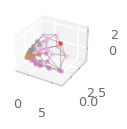

Iteration 4


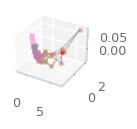

Iteration 5


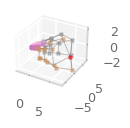

Iteration 6


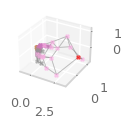

Iteration 7


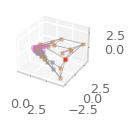

Iteration 8


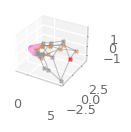

Iteration 9


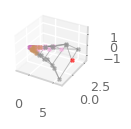

In [27]:
plot_latents_w_true_transitions(hue_order[0])